## Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto

This assignment requires the following:

<ol>
    <li>Creating a new Notebook for this assignment
    <li>Build the code to scrape Wikipedia page table of postal codes and transform the data into a pandas dataframe
    <li>Above dataframe must include
        <ul><li>Consist of three columns: PostalCode, Borough, and Neighborhood
            <li>Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned
            <li>More than one neighborhood can exist in one postal code area, convert these rows into one row with the neighborhoods separated with a comma as shown in row 11 of assignment table
            <li>If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough
            <li>Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making
            <li>In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe
        </ul>
    <li>Get latitude and longitude for Toronto and add to neighborhood dataframe 
    <li>Explore and cluster neighborhoods in Toronto
        <ul><li>reduce to only boroughs that contain the word Toronto
            <li>replicate the same analysis done with New York City data
            <li>add enough Markdown cells to explain what you decided to do and to report any observations you make
            <li>generate maps to visualize your neighborhoods and how they cluster together
        </ul>
    <li>Submit a link to your Notebook on your Github repository.
</ol>

In [1]:
## Install and Import Required Libraries

!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 122kB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 21.5MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              c

## 2. Convert Wikipedia Canadian Postal Codes into Dataframe 

Elements to do are:
<ul>
    <li>Scrape table from Wikipedia page of Canadian postal codes
    <li>Transform HTML data into pandas dataframe
</ul>

In [2]:
# Use BeautifulSoup to scrape table from wikipedia URL
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source,'lxml')
print(soup.title)

from IPython.display import display_html
tab = str(soup.table)

display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code
 
 Borough
 
 Neighborhood
 
 
 M1A
 
 Not assigned
 
 Not assigned
 
 
 M2A
 
 Not assigned
 
 Not assigned
 
 
 M3A
 
 North York
 
 Parkwoods
 
 
 M4A
 
 North York
 
 Victoria Village
 
 
 M5A
 
 Downtown Toronto
 
 Regent Park, Harbourfront
 
 
 M6A
 
 North York
 
 Lawrence Manor, Lawrence Heights
 
 
 M7A
 
 Downtown Toronto
 
 Queen's Park, Ontario Provincial Government
 
 
 M8A
 
 Not assigned
 
 Not assigned
 
 
 M9A
 
 Etobicoke
 
 Islington Avenue, Humber Valley Village
 
 
 M1B
 
 Scarborough
 
 Malvern, Rouge
 
 
 M2B
 
 Not assigned
 
 Not assigned
 
 
 M3B
 
 North York
 
 Don Mills
 
 
 M4B
 
 East York
 
 Parkview Hill, Woodbine Gardens
 
 
 M5B
 
 Downtown Toronto
 
 Garden District, Ryerson
 
 
 M6B
 
 North York
 
 Glencairn
 
 
 M7B
 
 Not assigned
 
 Not assigned
 
 
 M8B
 
 Not assigned
 
 Not assigned
 
 
 M9B
 
 Etobicoke
 
 West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
 
 
 M1C
 
 Scarborough
 
 Rouge Hill, Port Union, Highland Creek
 
 
 M2C
 
 Not assigned
 
 Not assigned
 
 
 M3C
 
 North York
 
 Don Mills
 
 
 M4C
 
 East York
 
 Woodbine Heights
 
 
 M5C
 
 Downtown Toronto
 
 St. James Town
 
 
 M6C
 
 York
 
 Humewood-Cedarvale
 
 
 M7C
 
 Not assigned
 
 Not assigned
 
 
 M8C
 
 Not assigned
 
 Not assigned
 
 
 M9C
 
 Etobicoke
 
 Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
 
 
 M1E
 
 Scarborough
 
 Guildwood, Morningside, West Hill
 
 
 M2E
 
 Not assigned
 
 Not assigned
 
 
 M3E
 
 Not assigned
 
 Not assigned
 
 
 M4E
 
 East Toronto
 
 The Beaches
 
 
 M5E
 
 Downtown Toronto
 
 Berczy Park
 
 
 M6E
 
 York
 
 Caledonia-Fairbanks
 
 
 M7E
 
 Not assigned
 
 Not assigned
 
 
 M8E
 
 Not assigned
 
 Not assigned
 
 
 M9E
 
 Not assigned
 
 Not assigned
 
 
 M1G
 
 Scarborough
 
 Woburn
 
 
 M2G
 
 Not assigned
 
 Not assigned
 
 
 M3G
 
 Not assigned
 
 Not assigned
 
 
 M4G
 
 East York
 
 Leaside
 
 
 M5G
 
 Downtown Toronto
 
 Central Bay Street
 
 
 M6G
 
 Downtown Toronto
 
 Christie
 
 
 M7G
 
 Not assigned
 
 Not assigned
 
 
 M8G
 
 Not assigned
 
 Not assigned
 
 
 M9G
 
 Not assigned
 
 Not assigned
 
 
 M1H
 
 Scarborough
 
 Cedarbrae
 
 
 M2H
 
 North York
 
 Hillcrest Village
 
 
 M3H
 
 North York
 
 Bathurst Manor, Wilson Heights, Downsview North
 
 
 M4H
 
 East York
 
 Thorncliffe Park
 
 
 M5H
 
 Downtown Toronto
 
 Richmond, Adelaide, King
 
 
 M6H
 
 West Toronto
 
 Dufferin, Dovercourt Village
 
 
 M7H
 
 Not assigned
 
 Not assigned
 
 
 M8H
 
 Not assigned
 
 Not assigned
 
 
 M9H
 
 Not assigned
 
 Not assigned
 
 
 M1J
 
 Scarborough
 
 Scarborough Village
 
 
 M2J
 
 North York
 
 Fairview, Henry Farm, Oriole
 
 
 M3J
 
 North York
 
 Northwood Park, York University
 
 
 M4J
 
 East York
 
 East Toronto, Broadview North (Old East York)
 
 
 M5J
 
 Downtown Toronto
 
 Harbourfront East, Union Station, Toronto Islands
 
 
 M6J
 
 West Toronto
 
 Little Portugal, Trinity
 
 
 M7J
 
 Not assigned
 
 Not assigned
 
 
 M8J
 
 Not assigned
 
 Not assigned
 
 
 M9J
 
 Not assigned
 
 Not assigned
 
 
 M1K
 
 Scarborough
 
 Kennedy Park, Ionview, East Birchmount Park
 
 
 M2K
 
 North York
 
 Bayview Village
 
 
 M3K
 
 North York
 
 Downsview
 
 
 M4K
 
 East Toronto
 
 The Danforth West, Riverdale
 
 
 M5K
 
 Downtown Toronto
 
 Toronto Dominion Centre, Design Exchange
 
 
 M6K
 
 West Toronto
 
 Brockton, Parkdale Village, Exhibition Place
 
 
 M7K
 
 Not assigned
 
 Not assigned
 
 
 M8K
 
 Not assigned
 
 Not assigned
 
 
 M9K
 
 Not assigned
 
 Not assigned
 
 
 M1L
 
 Scarborough
 
 Golden Mile, Clairlea, Oakridge
 
 
 M2L
 
 North York
 
 York Mills, Silver Hills
 
 
 M3L
 
 North York
 
 Downsview
 
 
 M4L
 
 East Toronto
 
 India Bazaar, The Beaches West
 
 
 M5L
 
 Downtown Toronto
 
 Commerce Court, Victoria Hotel
 
 
 M6L
 
 North York
 
 North Park, Maple Leaf Park, Upwood Park
 
 
 M7L
 
 Not assigned
 
 Not assigned
 
 
 M8L
 
 Not assigned
 
 Not assigned
 
 
 M9L
 
 North York
 
 Humber Summit
 
 
 

In [3]:
# Convert HTML table to pandas dataframe
df_init = pd.read_html(tab)
df_base =df_init[0]

df_base.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

## 3. Preprocess and Clean Dataframe

Dataframe to include:
<ul>
    <li>Consist of three columns: PostalCode, Borough, and Neighborhood
    <li>Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned
    <li>More than one neighborhood can exist in one postal code area, convert these rows into one row with the neighborhoods separated with a comma as shown in row 11 of assignment table
    <li>If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough
    <li>Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making
    <li>In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe
</ul>

In [4]:
# Drop rows with 'Not assigned'
df_not_assigned = df_base[df_base.Borough != 'Not assigned']

# Combine neighbourhoods with same Postalcode
df_toronto = df_not_assigned.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df_toronto.reset_index(inplace=True)

# Replace neighbourhoods which are 'Not assigned' with name of Borough
df_toronto['Neighborhood'] = np.where(df_toronto['Neighborhood'] == 'Not assigned',df_toronto['Borough'], df_toronto['Neighborhood'])

# Rename Postal Code to be CamelCased 
df_toronto.rename(columns={'Postal Code':'PostalCode'},inplace=True)

df_toronto

PostalCode           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
..         ...               ...   
98         M8X         Etobicoke   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   
101        M8Y         Etobicoke   
102        M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Victoria Village  
2                            Regent Park, Harbourfront  
3                     Lawrence Manor, Lawrence Heights  
4          Queen's Park, Ontario Provincial Government  
..                                                 ...  
98       The Kingsway, Montgomery Road, Old Mill North  
99                                Church and Wellesley  
100  Business reply mail Processing Centre, South C...  
101  Old Mill South, King's Mill Park, Sunnylea, Hu...  
102  Mimico NW, The Queensway West, South of Bloor,...  

[103 rows x 3 columns]

In [5]:
# Shape of dataframe
df_toronto.shape

(103, 3)

First submit point in Notebook
___

## 4. Get Latitude and Longitudes and Add to Dataframe

Use the Geocoder package or the Geospatial_data csv file to add latitude and longitude to Toronto Neighborhood dataframe.

In [6]:
# Import Geospatial_data csv file and merg into neighborhood dataframe

df_location = pd.read_csv('https://cocl.us/Geospatial_data')
df_location.rename(columns={'Postal Code':'PostalCode'},inplace=True)

df_location.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [7]:
df_combined = pd.merge(df_toronto,df_location,on='PostalCode')

df_combined

PostalCode           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
..         ...               ...   
98         M8X         Etobicoke   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   
101        M8Y         Etobicoke   
102        M8Z         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656  
1                                     Victoria Village  43.725882 -79.315572  
2                            Regent Park, Harbourfront  43.654260 -79.360636  
3                     Lawrence Manor, Lawrence Heights  43.718518 -79.464763  
4          Queen's Park, Ontario Provincial Government  43.662301 -79.389494  
..                                                 ...        ...        ...  
98       The Kingsway, Montgomery Road, Old Mill North  43.653654 -79.506944  
99                                Church and Wellesley  43.665860 -79.383160  
100  Business reply mail Processing Centre, South C...  43.662744 -79.321558  
101  Old Mill South, King's Mill Park, Sunnylea, Hu...  43.636258 -79.498509  
102  Mimico NW, The Queensway West, South of Bloor,...  43.628841 -79.520999  

[103 rows x 5 columns]

Second submit point in Notebook
___

## 5. Explore and Cluster Neighborhoods in Toronto

Elements to do are:
<ul>
    <li>reduce to only boroughs that contain the word Toronto
    <li>replicate same analysis done with New York City data
    <li>add enough Markdown cells to explain what you decided to do and to report any observations you make
    <li>generate maps to visualize your neighborhoods and how they cluster together
</ul>

In [8]:
# Create a new dataframe with only Boroughs which contain 'Toronto'

df_reduced = df_combined[df_combined['Borough'].str.contains('Toronto',regex=False)]

df_reduced

PostalCode           Borough  \
2          M5A  Downtown Toronto   
4          M7A  Downtown Toronto   
9          M5B  Downtown Toronto   
15         M5C  Downtown Toronto   
19         M4E      East Toronto   
20         M5E  Downtown Toronto   
24         M5G  Downtown Toronto   
25         M6G  Downtown Toronto   
30         M5H  Downtown Toronto   
31         M6H      West Toronto   
36         M5J  Downtown Toronto   
37         M6J      West Toronto   
41         M4K      East Toronto   
42         M5K  Downtown Toronto   
43         M6K      West Toronto   
47         M4L      East Toronto   
48         M5L  Downtown Toronto   
54         M4M      East Toronto   
61         M4N   Central Toronto   
62         M5N   Central Toronto   
67         M4P   Central Toronto   
68         M5P   Central Toronto   
69         M6P      West Toronto   
73         M4R   Central Toronto   
74         M5R   Central Toronto   
75         M6R      West Toronto   
79         M4S   Central Toronto   
80         M5S  Downtown Toronto   
81         M6S      West Toronto   
83         M4T   Central Toronto   
84         M5T  Downtown Toronto   
86         M4V   Central Toronto   
87         M5V  Downtown Toronto   
91         M4W  Downtown Toronto   
92         M5W  Downtown Toronto   
96         M4X  Downtown Toronto   
97         M5X  Downtown Toronto   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   

                                          Neighborhood   Latitude  Longitude  
2                            Regent Park, Harbourfront  43.654260 -79.360636  
4          Queen's Park, Ontario Provincial Government  43.662301 -79.389494  
9                             Garden District, Ryerson  43.657162 -79.378937  
15                                      St. James Town  43.651494 -79.375418  
19                                         The Beaches  43.676357 -79.293031  
20                                         Berczy Park  43.644771 -79.373306  
24                                  Central Bay Street  43.657952 -79.387383  
25                                            Christie  43.669542 -79.422564  
30                            Richmond, Adelaide, King  43.650571 -79.384568  
31                        Dufferin, Dovercourt Village  43.669005 -79.442259  
36   Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752  
37                            Little Portugal, Trinity  43.647927 -79.419750  
41                        The Danforth West, Riverdale  43.679557 -79.352188  
42            Toronto Dominion Centre, Design Exchange  43.647177 -79.381576  
43        Brockton, Parkdale Village, Exhibition Place  43.636847 -79.428191  
47                      India Bazaar, The Beaches West  43.668999 -79.315572  
48                      Commerce Court, Victoria Hotel  43.648198 -79.379817  
54                                     Studio District  43.659526 -79.340923  
61                                       Lawrence Park  43.728020 -79.388790  
62                                            Roselawn  43.711695 -79.416936  
67                                    Davisville North  43.712751 -79.390197  
68     Forest Hill North & West, Forest Hill Road Park  43.696948 -79.411307  
69                       High Park, The Junction South  43.661608 -79.464763  
73                   North Toronto West, Lawrence Park  43.715383 -79.405678  
74                 The Annex, North Midtown, Yorkville  43.672710 -79.405678  
75                              Parkdale, Roncesvalles  43.648960 -79.456325  
79                                          Davisville  43.704324 -79.388790  
80                      University of Toronto, Harbord  43.662696 -79.400049  
81                                  Runnymede, Swansea  43.651571 -79.484450  
83                         Moore Park, Summerhill East  43.689574 -79.383160  
84           Kensington Market, Chinatown, Grange Park  43.653206 -79.400049  
86   Summerhill West, Rathnelly, So

In [9]:
# Visualize only Boroughs with 'Toronto' using Folium

map_toronto = folium.Map(location=[43.651070,-79.347015], zoom_start=11, width='75%', height='75%')

for lat,lng,borough,neighborhood in zip(df_reduced['Latitude'],df_reduced['Longitude'],df_reduced['Borough'],df_reduced['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

# Display map
map_toronto

In [10]:
# Cluster neighborhoods using k-means

k=5
toronto_clustering = df_reduced.drop(['PostalCode','Borough','Neighborhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_
df_reduced.insert(0, 'Cluster Labels', kmeans.labels_)

df_reduced

Cluster Labels PostalCode           Borough  \
2                 0        M5A  Downtown Toronto   
4                 0        M7A  Downtown Toronto   
9                 0        M5B  Downtown Toronto   
15                0        M5C  Downtown Toronto   
19                4        M4E      East Toronto   
20                0        M5E  Downtown Toronto   
24                0        M5G  Downtown Toronto   
25                3        M6G  Downtown Toronto   
30                0        M5H  Downtown Toronto   
31                1        M6H      West Toronto   
36                0        M5J  Downtown Toronto   
37                3        M6J      West Toronto   
41                4        M4K      East Toronto   
42                0        M5K  Downtown Toronto   
43                3        M6K      West Toronto   
47                4        M4L      East Toronto   
48                0        M5L  Downtown Toronto   
54                4        M4M      East Toronto   
61                2        M4N   Central Toronto   
62                2        M5N   Central Toronto   
67                2        M4P   Central Toronto   
68                2        M5P   Central Toronto   
69                1        M6P      West Toronto   
73                2        M4R   Central Toronto   
74                3        M5R   Central Toronto   
75                1        M6R      West Toronto   
79                2        M4S   Central Toronto   
80                3        M5S  Downtown Toronto   
81                1        M6S      West Toronto   
83                2        M4T   Central Toronto   
84                3        M5T  Downtown Toronto   
86                2        M4V   Central Toronto   
87                0        M5V  Downtown Toronto   
91                0        M4W  Downtown Toronto   
92                0        M5W  Downtown Toronto   
96                0        M4X  Downtown Toronto   
97                0        M5X  Downtown Toronto   
99                0        M4Y  Downtown Toronto   
100               4        M7Y      East Toronto   

                                          Neighborhood   Latitude  Longitude  
2                            Regent Park, Harbourfront  43.654260 -79.360636  
4          Queen's Park, Ontario Provincial Government  43.662301 -79.389494  
9                             Garden District, Ryerson  43.657162 -79.378937  
15                                      St. James Town  43.651494 -79.375418  
19                                         The Beaches  43.676357 -79.293031  
20                                         Berczy Park  43.644771 -79.373306  
24                                  Central Bay Street  43.657952 -79.387383  
25                                            Christie  43.669542 -79.422564  
30                            Richmond, Adelaide, King  43.650571 -79.384568  
31                        Dufferin, Dovercourt Village  43.669005 -79.442259  
36   Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752  
37                            Little Portugal, Trinity  43.647927 -79.419750  
41                        The Danforth West, Riverdale  43.679557 -79.352188  
42            Toronto Dominion Centre, Design Exchange  43.647177 -79.381576  
43        Brockton, Parkdale Village, Exhibition Place  43.636847 -79.428191  
47                      India Bazaar, The Beaches West  43.668999 -79.315572  
48                      Commerce Court, Victoria Hotel  43.648198 -79.379817  
54                                     Studio District  43.659526 -79.340923  
61                                       Lawrence Park  43.728020 -79.388790  
62                                            Roselawn  43.711695 -79.416936  
67                                    Davisville North  43.712751 -79.390197  
68     Forest Hill North & West, Forest Hill Road Park  43.696948 -79.411307  
69                       High Park, The Junction South  43.661608 -79.464763  
73                   North T

In [11]:
# Visualize a Second Map with Clustered Boroughs

map_clusters = folium.Map(location=[43.651070,-79.347015], zoom_start=11, width='75%', height='75%')

# Set colors for clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add color markers
markers_colors = []
for lat, lon, neighborhood, cluster in zip(df_reduced['Latitude'], df_reduced['Longitude'], df_reduced['Neighborhood'], df_reduced['Cluster Labels']):
    label = '{}, {}'.format(' Cluster ' + str(cluster), neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

# Display map
map_clusters

Third submit point in Notebook
___

## 6. Screenshots of Toronto Borough Maps

The above maps may not render in GitHub. They should look like the following:

Map 1 = Toronto Inner Boroughs

![Map1_Toronto_Boroughs.png](Map1_Toronto_Boroughs.png)

Map 2 = Toronto Inner Boroughs (Clustered)

![Map2_Toronto_Boroughs_Clustered.png](Map2_Toronto_Boroughs_Clustered.png)
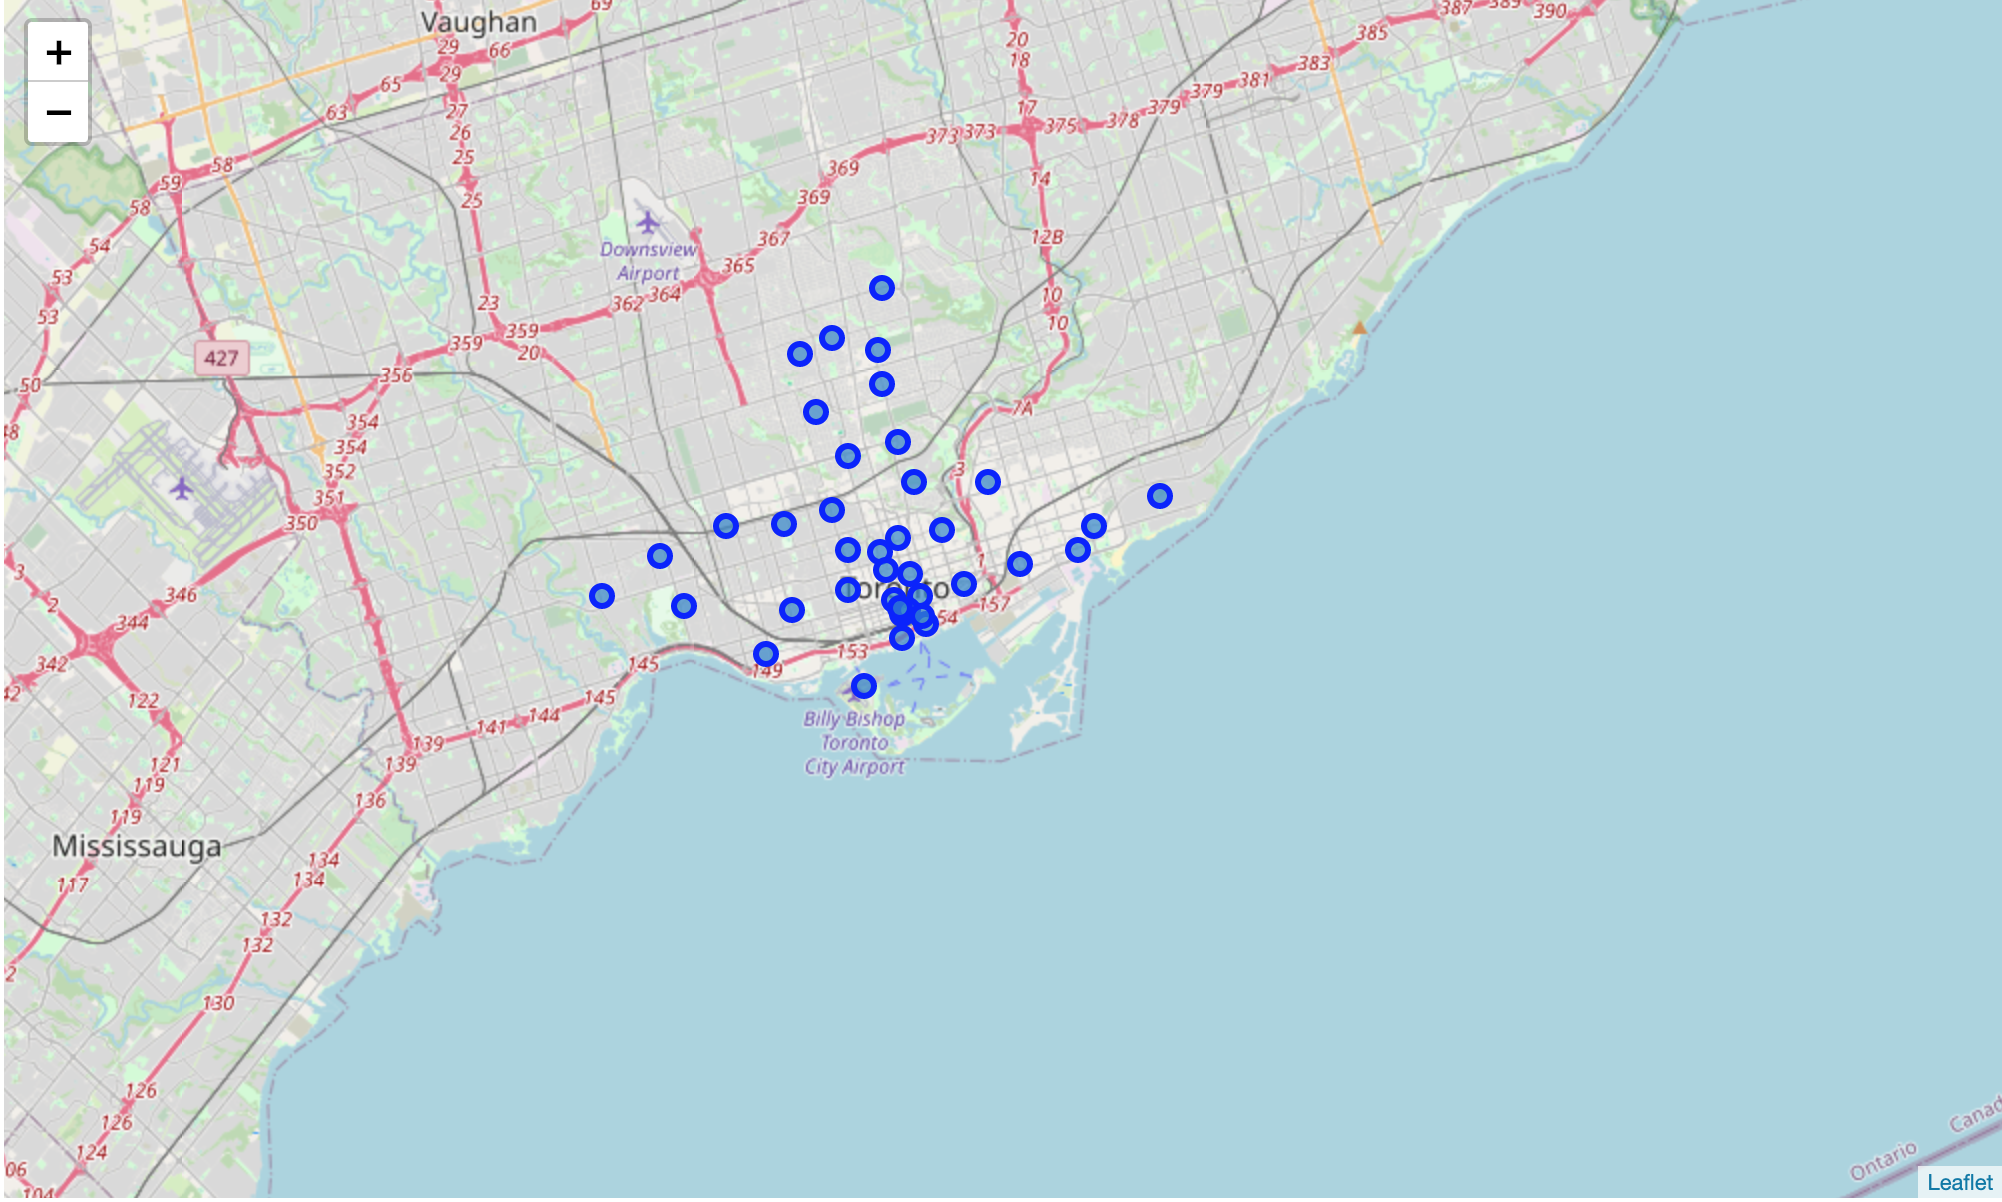
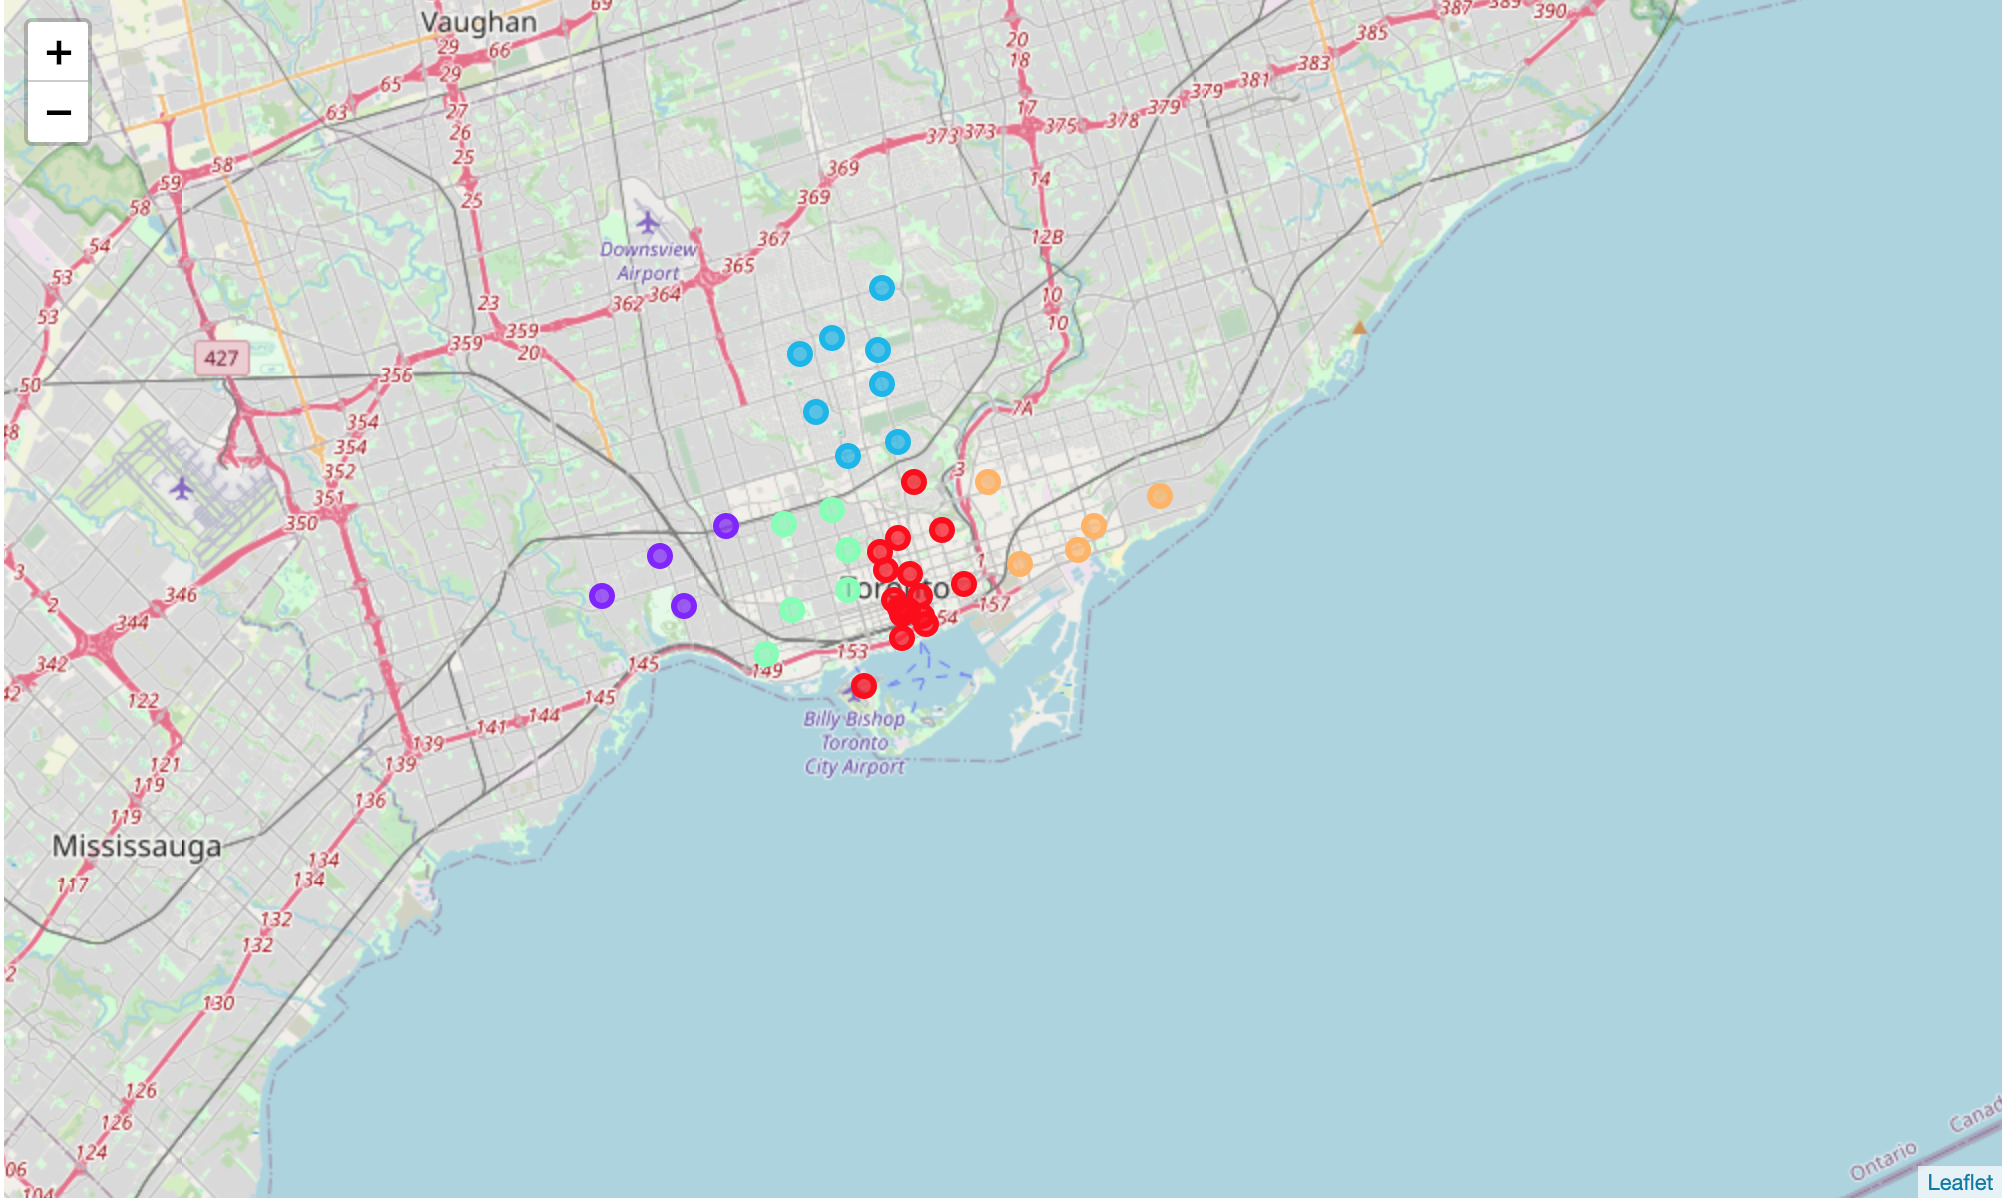